Launching the environment and setting its parameters: `env`, `brain_name`, `state_size` and `action_size`

In [1]:
from unityagents  import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


Importing all necessary modules

In [2]:
from Agent import *
from DQN_Train import *
from AgentPlay import *
# In case you want to just check the agent (not train or watch) uncomment below
# state_size=37
# action_size=4

Defining the `agent`. Notice you can change all hyperparameters by `agent.`(hyperparameter). The `DQN` network trains faster. If you want to train the `MHQ-DFQNetwork`, change `network = "mhq_dfq"`.

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, network = "q", mh_size=10,
    hidden_layer=2, hidden_layer_d=0, hidden_layer_size=32, seed=0, time_aware=False)

Training the agent to solve the environment (`target_score=13`).

In [ ]:
scores,avgs=dqn_train(agent,env,brain_name,n_episodes=2000, max_t=1000,
                      eps_start=EPS_START, eps_end=EPS_END, eps_decay=EPS_DECAY,
        target_score=13,mh_take_action=False,which_mh=None)

Load any desirable checkpoint (be careful to initialize the agent correctly so that it can be loaded with the parameters of your choice). Here we have listed the best two checkpoints with score around 16 depending on the model.

In [11]:
#for agent.network="mhq_dfq"  (default : score 16, not time aware)
agent.mhqnetwork_local.load_state_dict(torch.load(f"Checkpoints/score_16_1000005000.990.0010.000122320mhq_dfqFalse1000.90.010.98494mhq_local.ph", map_location=device))
agent.dfqnetwork_local.load_state_dict(torch.load(f"Checkpoints/score_16_1000005000.990.0010.000122320mhq_dfqFalse1000.90.010.98494dfq_local.ph", map_location=device))
agent.mhqnetwork_target.load_state_dict(torch.load(f"Checkpoints/score_16_1000005000.990.0010.000122320mhq_dfqFalse1000.90.010.98494mhq_target.ph", map_location=device))
agent.dfqnetwork_target.load_state_dict(torch.load(f"Checkpoints/score_16_1000005000.990.0010.000122320mhq_dfqFalse1000.90.010.98494dfq_target.ph", map_location=device))

In [4]:
#for vanilla DQNetwork (default: score 16.5)
agent.qnetwork_local.load_state_dict(torch.load(f"Checkpoints/score_16.5_1000005000.990.0010.0001223200.90.010.98_solved_at_225localq.ph", map_location=device))
agent.qnetwork_target.load_state_dict(torch.load(f"Checkpoints/score_16.5_1000005000.990.0010.0001223200.90.010.98_solved_at_225targetq.ph", map_location=device))

Watch the agent play some episodes after loading any one of the desirable checkpoints. To run for many episodes quickly, set `train_mode=True`. Check the docstring of `AgentPlay` to know more about the other arguments.

In [ ]:
score_list,loop_list=AgentPlay(agent,env,brain_name,train_mode=True,counter_states=3,view_episodes=20,
              loop_breaker=False,mh_take_action=False,which_mh=None)

You can also check the training history of any provided agent. They are the files beginning with `score_history...`. Here is one example for `DQNetwork`.

Episode 100	Average Score: 4.39
Episode 200	Average Score: 12.23
Episode 225	Average Score: 13.06

Environment solved in 225 episodes!	Average Score: 13.06


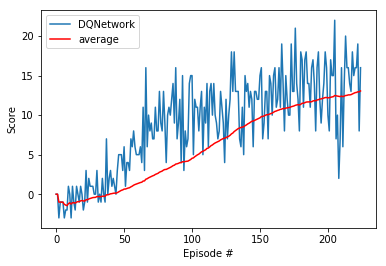

In [25]:
from plot_saved_results import *
plot_results(f'Checkpoints/score_history_score_13_1000005000.990.0010.0001223200.90.010.98225localq','DQNetwork')

The learned discount function $\Gamma(t)=\sum \alpha_i \gamma_i^t$ where $\alpha_i$ are `DFQNetwork` weights. We can calculate it using the following code (given a `MHQ-DFQNetwork`) and compare it to exponential weighting. This is an example for the agent with score 16.

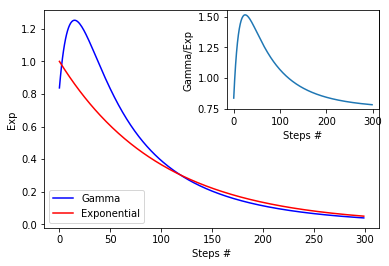

In [20]:
Gamma=np.array([(agent.dfqnetwork_local.linear[0].weight * (agent.discounts**i)).sum() for i in range(300)])
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(Gamma)), Gamma,c='b',label='Gamma')
plt.ylabel('Gamma')
plt.xlabel('Steps #')
plt.plot(np.arange(len(Gamma)), [0.99**t for t in range(300)],c='r',label='Exponential')
plt.ylabel('Exp')
plt.xlabel('Steps #')
plt.legend(loc='lower left')
ax = fig.add_subplot(222)
plt.plot(np.arange(len(Gamma)), [Gamma[t]/0.99**t for t in range(300)])
plt.ylabel('Gamma/Exp')
plt.xlabel('Steps #')
plt.show()

In [ ]:
env.close()